Q1. What is the mathematical formula for a linear SVM? 

The mathematical formula for a linear Support Vector Machine (SVM) is used to define the decision boundary that separates different classes in a binary classification problem. Given a set of training data points and their corresponding labels, the goal of a linear SVM is to find a hyperplane that maximizes the margin between the two classes. The equation of this hyperplane can be expressed as:

w * x + b = 0

Here's what these terms represent:

"w" is the weight vector (also known as the coefficients or normal vector) perpendicular to the hyperplane.
"x" is the input feature vector.
"b" is the bias term (also known as the intercept).
To make predictions using this hyperplane, you can use the sign of the expression w * x + b. Specifically, if w * x + b is greater than 0, the input data point belongs to one class, and if it's less than 0, it belongs to the other class.

Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is used to define the optimization problem that the SVM aims to solve. The objective function in a linear SVM is designed to maximize the margin between the two classes while ensuring that all training data points are correctly classified. The objective function is typically expressed as follows:

Minimize: 1/2 * ||w||^2

Subject to: y_i * (w * x_i + b) >= 1 for all training data points (x_i, y_i)

Here's what these terms represent:

"w" is the weight vector (also known as the coefficients or normal vector) perpendicular to the hyperplane.
"x_i" is a training data point.
"b" is the bias term (also known as the intercept).
"y_i" represents the class labels (-1 or 1) for the training data points.

The objective function aims to minimize the L2 norm (Euclidean norm) of the weight vector "w," which corresponds to maximizing the margin. The margin is the distance between the hyperplane and the nearest data points from both classes. Maximizing this margin helps create a decision boundary that is well-separated from the data points, leading to a more robust classifier.


Q3.What is the kernel trick in SVM?

The kernel trick is a powerful concept in Support Vector Machines (SVMs) and other machine learning algorithms, primarily used to handle nonlinear data and transform it into a higher-dimensional space without explicitly calculating the transformations. It enables SVMs to learn complex decision boundaries that are not linearly separable in the original feature space.

In the standard SVM formulation, we aim to find a hyperplane that best separates data points of different classes. This works well for linearly separable data, but many real-world problems involve data that is not linearly separable. The kernel trick addresses this limitation by implicitly mapping the original data into a higher-dimensional space where the data might become linearly separable.

The kernel trick involves replacing the dot product between feature vectors with a kernel function, denoted as K(x, y), which computes the similarity between two data points "x" and "y" in this higher-dimensional space. The kernel function can be thought of as a measure of similarity between data points. The most commonly used kernel functions include:

1. Linear Kernel (no transformation):
K(x, y) = x * y

2. Polynomial Kernel:
K(x, y) = (α * x * y + c)^d

Parameters:

α is a scaling factor.
c is a constant term.
d is the degree of the polynomial.

3. Radial Basis Function (RBF) Kernel (Gaussian Kernel):
K(x, y) = exp(-γ * ||x - y||^2)

Parameters:

γ controls the spread of the kernel function.

4. Sigmoid Kernel:
K(x, y) = tanh(α * x * y + c)
Parameters:

α is a scaling factor.
c is a constant term.


Q4. What is the role of support vectors in SVM Explain with example.

In Support Vector Machines (SVM), support vectors are the data points from the training dataset that are closest to the decision boundary (the hyperplane). These support vectors play a crucial role in defining the decision boundary and the margin. Specifically, they are the data points that have a non-zero weight (also called the Lagrange multiplier or alpha) in the optimization problem used to find the optimal hyperplane. The presence of these non-zero alpha values indicates that these points are essential for determining the position and orientation of the hyperplane.

Here's an explanation with a Python example using the popular machine learning library, scikit-learn:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate a simple dataset for classification (two classes)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)



In [3]:
X,y

(array([[ 0.55942643,  2.38869353],
        [ 1.31217492, -0.7173148 ],
        [-1.5598485 , -1.92487377],
        [-2.2813861 , -0.1368559 ],
        [ 1.56070438, -0.42795824],
        [-0.80804463,  1.19664076],
        [-0.27062383, -2.25553963],
        [ 0.480502  ,  0.54914434],
        [-1.20757158, -1.26898369],
        [ 0.25415746, -1.79532002],
        [ 2.59123946,  0.24472415],
        [ 0.07123641,  0.49429823],
        [-1.17762637, -1.20592943],
        [ 0.93343952,  0.68811892],
        [ 1.65214494, -0.35885569],
        [-1.40735658, -1.56826626],
        [ 1.02255619, -1.08324727],
        [-0.81680628, -0.6795874 ],
        [ 1.50575249, -0.38919817],
        [-2.17105282, -0.04862909],
        [ 0.71479373, -1.42922002],
        [-0.15013844, -0.11708689],
        [-1.4117586 , -1.5332749 ],
        [-2.58590856, -0.40925706],
        [ 0.82600732, -1.05383855],
        [-0.07133524,  0.08896214],
        [ 0.6273745 , -1.32933233],
        [ 1.65882246, -0.431

In [4]:
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the classifier to the data
clf.fit(X, y)

SVC(kernel='linear')

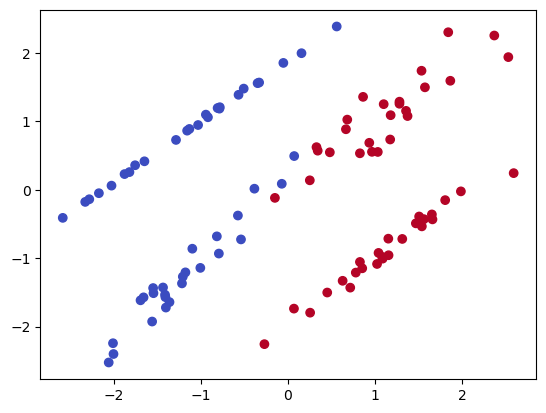

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


In [8]:
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])



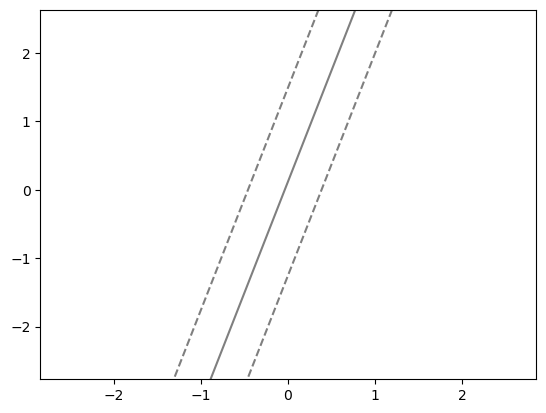

In [9]:
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


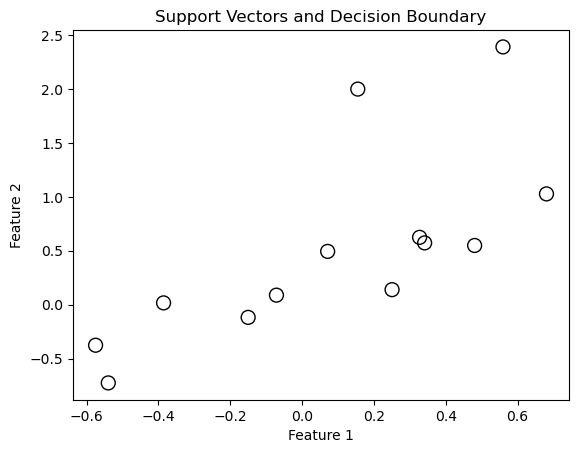

In [10]:
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Support Vectors and Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in 
SVM.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Fit a Hard Margin SVM model (C=1e6 for a large penalty on misclassification)
hard_margin_model = svm.SVC(kernel='linear', C=1e6)
hard_margin_model.fit(X, y)

SVC(C=1000000.0, kernel='linear')

In [4]:
soft_margin_model = svm.SVC(kernel='linear', C=1)
soft_margin_model.fit(X, y)


SVC(C=1, kernel='linear')

In [5]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Plot the data points
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Hard Margin SVM')

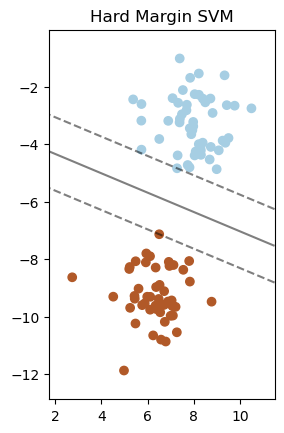

In [7]:
# Plot Hard Margin SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
Z = hard_margin_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title("Hard Margin SVM")


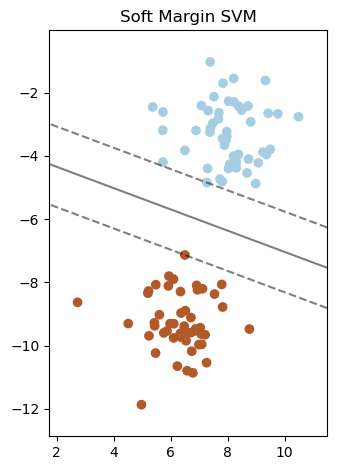

In [8]:
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
Z = soft_margin_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title("Soft Margin SVM")

plt.tight_layout()
plt.show()

Q7.SVM Implementation through Iris dataset. 

Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optionally, you can visualize the decision boundary if you have only two features
if X_train.shape[1] == 2:
    # Create a meshgrid for plotting
    xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                         np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
    
    Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


Accuracy: 96.67%


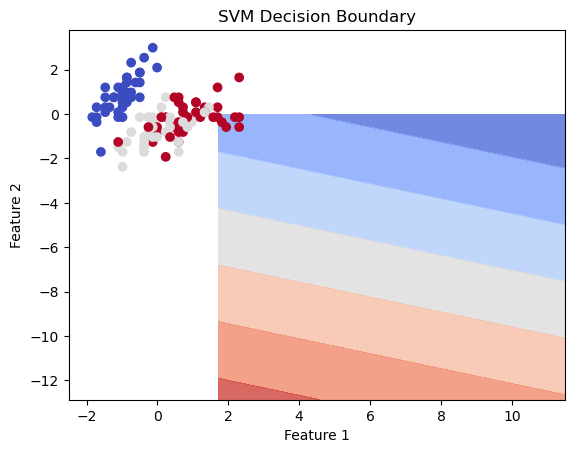

In [16]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

Train a linear SVM classifier on the training set and predict the labels for the testing set. 

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a linear SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the training set
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


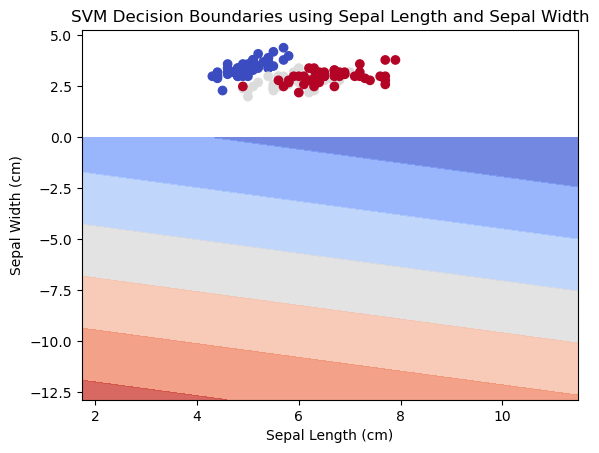

In [20]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries using Sepal Length and Sepal Width')
plt.show()


In [21]:
C_values = [0.01, 0.1, 1, 10, 100]

for C in C_values:
    # Create a linear SVM classifier with the current C value
    svm_classifier = SVC(kernel='linear', C=C, random_state=42)

    # Train the SVM classifier on the training set
    svm_classifier.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = svm_classifier.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
    print(f"C={C}, Accuracy: {accuracy * 100:.2f}%")

C=0.01, Accuracy: 96.67%
C=0.1, Accuracy: 100.00%
C=1, Accuracy: 96.67%
C=10, Accuracy: 96.67%
C=100, Accuracy: 100.00%
